In [1]:
# load the data 
using JLD: load
rats=load("experiment.jld");
 rats = rats["rats"] ;

In [2]:
# define all relevant variables 
numberofrats=rats.featuresexperiment[1];
numberofdays=rats.featuresexperiment[2];
numberoftrials=rats.featuresexperiment[3];

dt=0.1;
R=100.0;
r=5.0;
angles=[-3*pi/4, -2*pi/4, -pi/4, 0, pi/4, 2*pi/4, 3*pi/4, pi];
T=120; # maximal duration of a trial in seconds
σ=0.30*100; # variability of place cell activity, in centimeters
times=collect(0:dt:T+dt);


# Potential positions of the platform : 
Xplatform=[0.3,0,-0.3,0,0.5,-0.5,0.5,-0.5].*R; # in cm
Yplatform=[0,0.3,0,-0.3,0.5,0.5,-0.5,-0.5].*R;# in cm


In [3]:
# define function we will need 

function  placecells(position,centres,width)
# PLACECELLS Calculates the activity of the place cells in the simulation.
#
#	F = PLACECELLS(POSITION,CENTRES,WIDTH) calculates the activity of the place cells
#	in the simulation. The returned vector F is of length N, where N is the number of place
#	cells, and it contains the activity of each place cell given the simulated rat's current
#	POSITION (a 2 element column vector). The activity of the place cells is modelled as a
#	rate-of-fire (i.e. a scalar value) determined by a gaussian function. The CENTRES of the
#	gaussian functions are an argument, and must be a 2 x N matrix containing each place
#	cell's preferred location in 2D space. The WIDTH of the place cell fields must
#	also be provided as a scalar value (all place cells are assumed to have the same
#	width).
#
#	The returned vector, F, must be a N element column vector.
#
#	Code for BIO/NROD08 Assignment 2, Winter 2017
#	Author: Blake Richards, blake.richards@utoronto.ca


# calculate the place cell activity
F = exp.(-sum((repmat(position,1,size(centres,2))-centres).^2,1)/(2*width^2))';
return F
end


placecells (generic function with 1 method)

In [4]:
# Plot value map at the beginning and at the end 

# chose rat 

indexrat=1;

centres=transpose([rats.experiment[indexrat].PlaceCells[:,1] rats.experiment[indexrat].PlaceCells[:,2]]);

# establish the grid of points in the pool
x=[-R+5(k-1) for k=1:floor(2*R/5)];
y=transpose(x);
x2=x;
y2=y;

# initalize the valu map variable
vbegin = zeros(length(x),length(x));
vend = zeros(length(x),length(x));

Wbegin=rats.experiment[indexrat].day[1].trial[1].Valuemap;
Wend=rats.experiment[indexrat].day[1].trial[numberoftrials].Valuemap;

# for each place point in the grid, calculate the critic value
for i = 1:length(x)
    for j = 1:length(x)

        # make sure the point is in the pool
        if sqrt((x[i]^2+y[j]^2)) < R
        
            # determine the place cell activity at this point
            F = placecells([x[i],y[j]],centres,σ)           
            # determine the actor activity
            vbegin[i,j] = dot(Wbegin,F);
            vend[i,j] = dot(Wend,F);
        else
            vbegin[i,j] = NaN;
            vend[i,j] = NaN;
        end
    end
end


#using Plots, ProgressMeter
## show the value map
#plot(x,y,vbegin)
#plot!(R*cos.(theta),R*sin.(theta),-0.1,"k-")
#plot!(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),-0.1,"m-")
#plot!(p[1],camera=(15,40))


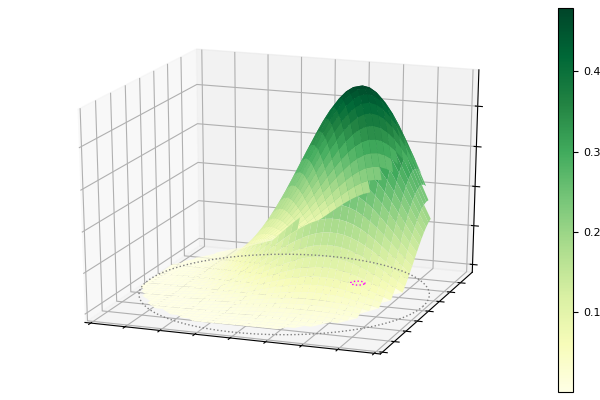

In [5]:
#using Plots #, ProgressMeter
using Plots
pyplot(grid=false)#,ax=gca(), ax[:set_axis_off]())

## show the value map
y=x;
theta=0:0.01:2*pi;
p =Plots.surface(x,y,vbegin, color=:YlGn);# ,transparent=false)# ,foreground_color_grid=:white)#fc = :haline)
# p =Plots.surface(x,y,vbegin, cmap="L1",foreground_color_grid=:white)#fc = :haline)
plot!(p[1], camera = (20,20))
#
plot!(R*cos.(theta),R*sin.(theta),-0.01.*ones(length(theta)),color=:grey,style=:dot,leg=false,grid=false)
plot!(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),-0.01.*ones(length(theta)),color=:magenta,style=:dot)
plot!( xgrid=false, ygrid= false,ticks=nothing,border=false)

#ax=gca()
#ax[:set_axis_off]
#show()
#ax=gca()
#ax[:set_axis_off]()
#

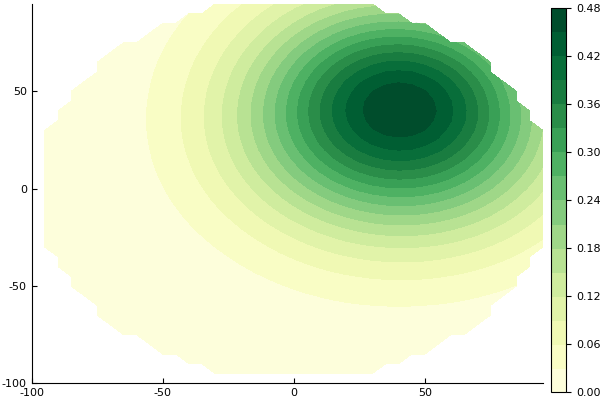

/Users/pmxct2/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


In [6]:

X = repmat(transpose(x),length(y),1)
Y = repmat(y,1,length(x))
p1 = contour(x,y,vbegin,fill=true,color=:YlGn)
plot(p1)
#plot(p1)

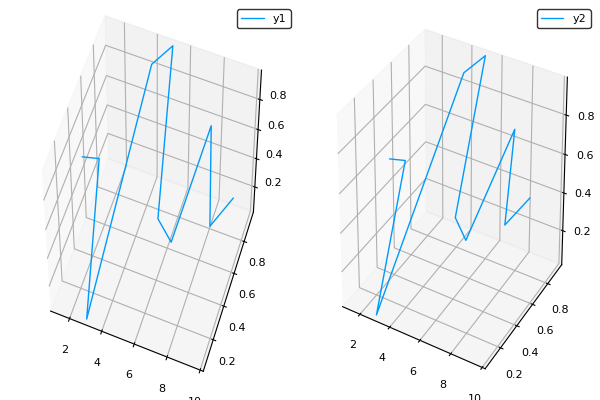

In [7]:
x = 1:1:10
y = z = rand(10)
p = plot(x, y, [z, z], layout = 2)
plot!(p[1], camera = (20,50))

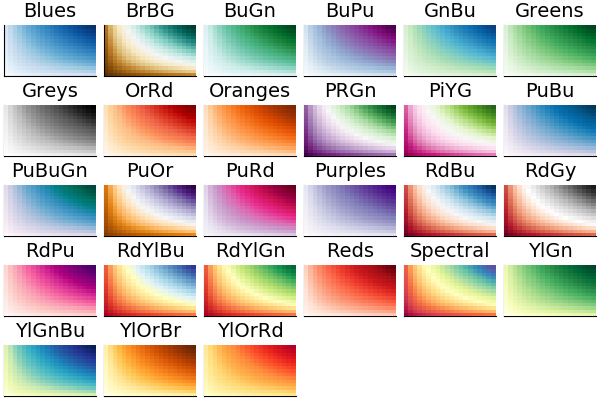

In [8]:
showlibrary(:colorbrewer,gradient=:sequential )

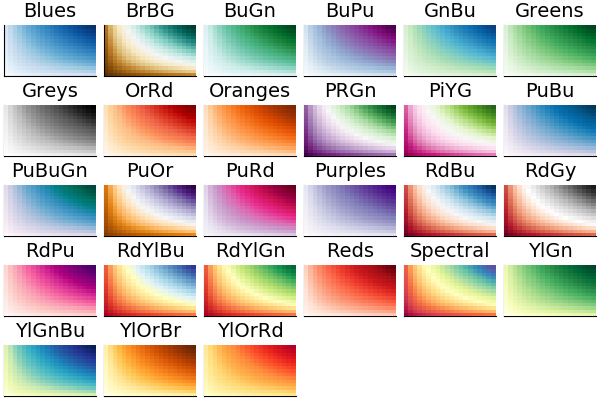

In [9]:
showlibrary(:colorbrewer,gradient=:diverging )

In [10]:
cgradients(:colorcet)

21-element Array{Symbol,1}:
 :kg        
 :gwv       
 :kb        
 :cinferno  
 :bkr       
 :isolum    
 :dimgray   
 :fire      
 :bky       
 :kdc       
 :kr        
 :bgyw      
 :rainbow   
 :bmw       
 :blues     
 :colorwheel
 :coolwarm  
 :bgy       
 :bjy       
 :gray      
 :kgy       

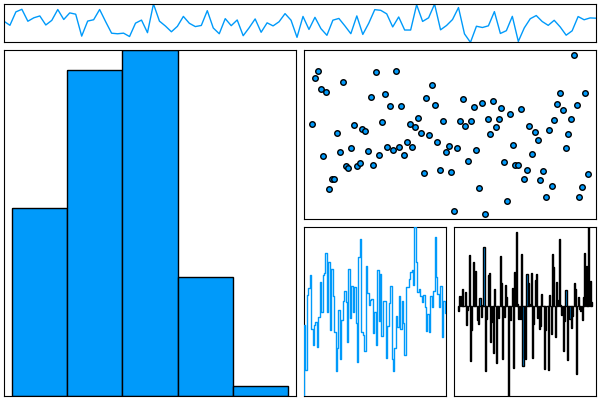

In [11]:
l = @layout([a{0.1h};b [c;d e]])
plot(randn(100,5),layout=l,
     t=[:line :histogram :scatter :steppre :bar],leg=false,ticks=nothing,border=false)

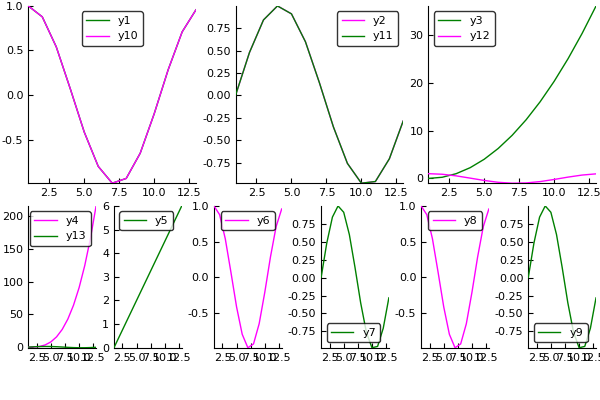

In [12]:


theta=0:0.5:2*pi;
l = @layout([a b c ; [d{0.8h} e f g h i]])
plot([[[cos.(theta),sin.(theta)],theta.^2,theta.^3,theta,cos.(theta),sin.(theta),cos.(theta),sin.(theta),cos.(theta),sin.(theta),cos.(theta),sin.(theta)]],layout=l,color=[:green :magenta])
#plot!(theta,sin.(theta),layout=2)

In [13]:
plot(R*cos.(theta),R*sin.(theta),"k-")
plot(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),"m-")
quiver(x,y,ubegin,vbegin,color="b");
xlabel("X Position (cm)");
ylabel("Y Position (cm)");

LoadError: [91mNo user recipe defined for String[39m

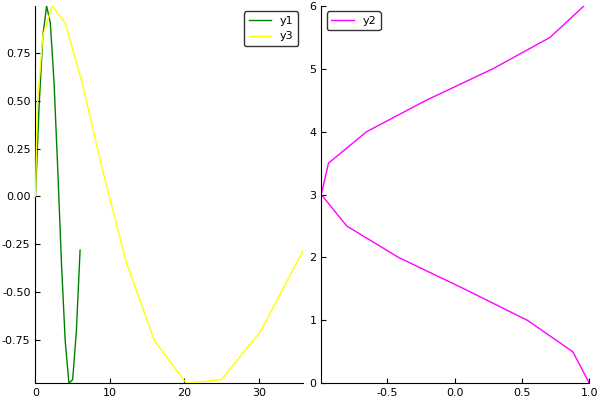

In [14]:
theta=0:0.5:2*pi;
l = @layout([a b])
c=[:green :magenta :yellow];
plot([theta,[cos.(theta),theta.^2]],[sin.(theta),theta],layout=l,color=c)


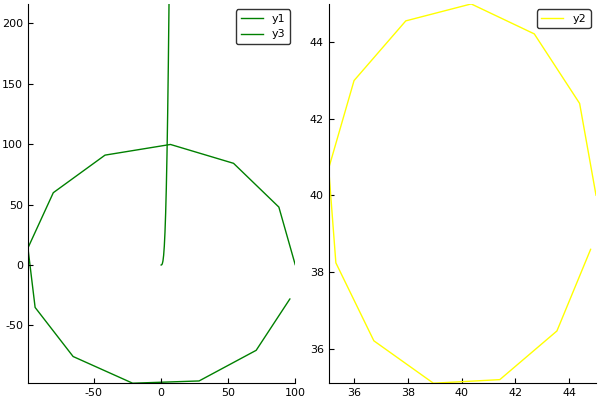

In [15]:
theta=0:0.5:2*pi;
l = @layout([a b])
c=[:green  :yellow];
plot([R*cos.(theta),rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),theta],[R*sin.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),theta.^3],layout=l,color=c)


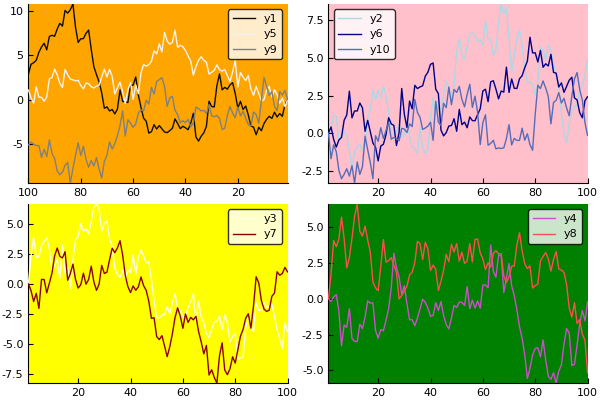

In [16]:
plot(Plots.fakedata(100,10),layout=4,palette=[:grays :blues :heat :lightrainbow],bg_inside=[:orange :pink :yellow :green])
plot!(xflip=[true false false false], xgrid=[true false true false], ygrid=[true true false false])

In [102]:
## Plot action map 

# initalize the vectors of action directions
actvec = [cos.(angles) sin.(angles)]

# establish the grid of points in the pool
x=[-R+5(k-1) for k=1:floor(2*R/5)];
y=transpose(x);

x2=zeros(length(x)*length(x));
y2=zeros(length(x)*length(x));

# initalize the vector map variables
ubegin = zeros(length(x),length(x));
vbegin = zeros(length(x),length(x));
uend = zeros(length(x),length(x));
vend = zeros(length(x),length(x));

zbegin=rats.experiment[indexrat].day[1].trial[1].ActionMap;
zend=rats.experiment[indexrat].day[1].trial[numberoftrials].ActionMap;

# for each place point in the grid, calculate the vector of preferred action direction
for i = 1:length(x)
    for j = 1:length(x)
        # make sure the point is in the pool
        if sqrt((x[i]^2+y[j]^2)) < R
            
            # determine the place cell activity at this point
            actplacecell = placecells([x[i];y[j]],centres,σ);
            
             #  Compute action cell activity    
             actactioncellend=transpose(zend)*actplacecell; 
            
             #  Compute action cell activity    
             actactioncellbegin=transpose(zbegin)*actplacecell; 
        
             if maximum(actactioncellbegin)>=100 
                 actactioncellbegin=100.*actactioncellbegin./maximum(actactioncellbegin); 
                elseif maximum(actactioncellend)>=100
                actactioncellend=100.*actactioncellend./maximum(actactioncellend); 
             end
             
            # Compute probability distribution : 
            Pactioncellbegin=exp.(2.*actactioncellbegin)./sum(exp.(2.*actactioncellbegin)); 
            Pactioncellend=exp.(2.*actactioncellend)./sum(exp.(2.*actactioncellend)); 
            
            
            # determine the weighted action vector
            wavbegin = sum([Pactioncellbegin.*actvec[:,1] Pactioncellbegin.*actvec[:,2]],1);
            wavend = sum([Pactioncellend.*actvec[:,1] Pactioncellend.*actvec[:,2]],1);
            # store the result in u and v
            ubegin[i,j] = 5*wavbegin[1];
            vbegin[i,j] = 5*wavbegin[2];
            uend[i,j] = 5*wavend[1];
            vend[i,j] = 5*wavend[2];
        else
            #x[i] = NaN;
            #y[j] = NaN;
            ubegin[i,j]= 0;
            vbegin[i,j] = 0;
            uend[i,j]= 0;
            vend[i,j] = 0;
        end
    end
end


using Plots
pyplot()
x2=zeros(length(x)*length(x));
for j=1:length(x)
    for l=1:length(x)
        x2[j*l]=x[l]
        
    end 
end 
x2=sort(x2);
y2=x2;


#plot(R*cos.(theta),R*sin.(theta),color=:black)
#plot!(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),color=:magenta)
quiver(x2,y2,uend[:],vend[:],color=:black);

LoadError: [91mCouldn't process recipe args: (Array{Float64,1}, Array{Float64,1}, Array{Float64,1}, Array{Float64,1})[39m